In [1]:
!pip install opencv-python-headless

#1. Utilizando un dataset de object detection: Importando el dataset de conducción autónoma.

In [2]:
import os
import pathlib
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
!git clone https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 98359, done.
remote: Counting objects: 100% (866/866), done.
remote: Compressing objects: 100% (468/468), done.
remote: Total 98359 (delta 463), reused 720 (delta 375), pack-reused 97493 (from 1)
Receiving objects: 100% (98359/98359), 621.96 MiB | 24.38 MiB/s, done.
Resolving deltas: 100% (71456/71456), done.


In [4]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Processing /content/models/research
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparin

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2024.10.0 requires cloudpickle>=3.0.0, but you have cloudpickle 2.2.1 which is incompatible.


In [5]:
!pip install tensorflow

In [6]:
from object_detection.utils import visualization_utils as viz_utils

In [7]:
import tensorflow as tf

In [8]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [9]:
!unzip '/content/drive/MyDrive/archive.zip'

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: images/1479502279230178611.jpg  
  inflating: images/1479502279730506173.jpg  
  inflating: images/1479502280230536426.jpg  
  inflating: images/1479502280730839737.jpg  
  inflating: images/1479502281729824146.jpg  
  inflating: images/1479502282229848985.jpg  
  inflating: images/1479502282730102580.jpg  
  inflating: images/1479502283731724690.jpg  
  inflating: images/1479502284232432719.jpg  
  inflating: images/1479502285221790200.jpg  
  inflating: images/1479502285730163274.jpg  
  inflating: images/1479502286231098378.jpg  
  inflating: images/1479502287230097438.jpg  
  inflating: images/1479502287730246905.jpg  
  inflating: images/1479502288231261057.jpg  
  inflating: images/1479502288731301852.jpg  
  inflating: images/1479502289730529475.jpg  
  inflating: images/1479502290232668314.jpg  
  inflating: images/1479502291230742118.jpg  
  inflating: images/1479502292231318149.jpg  
  inflating: 

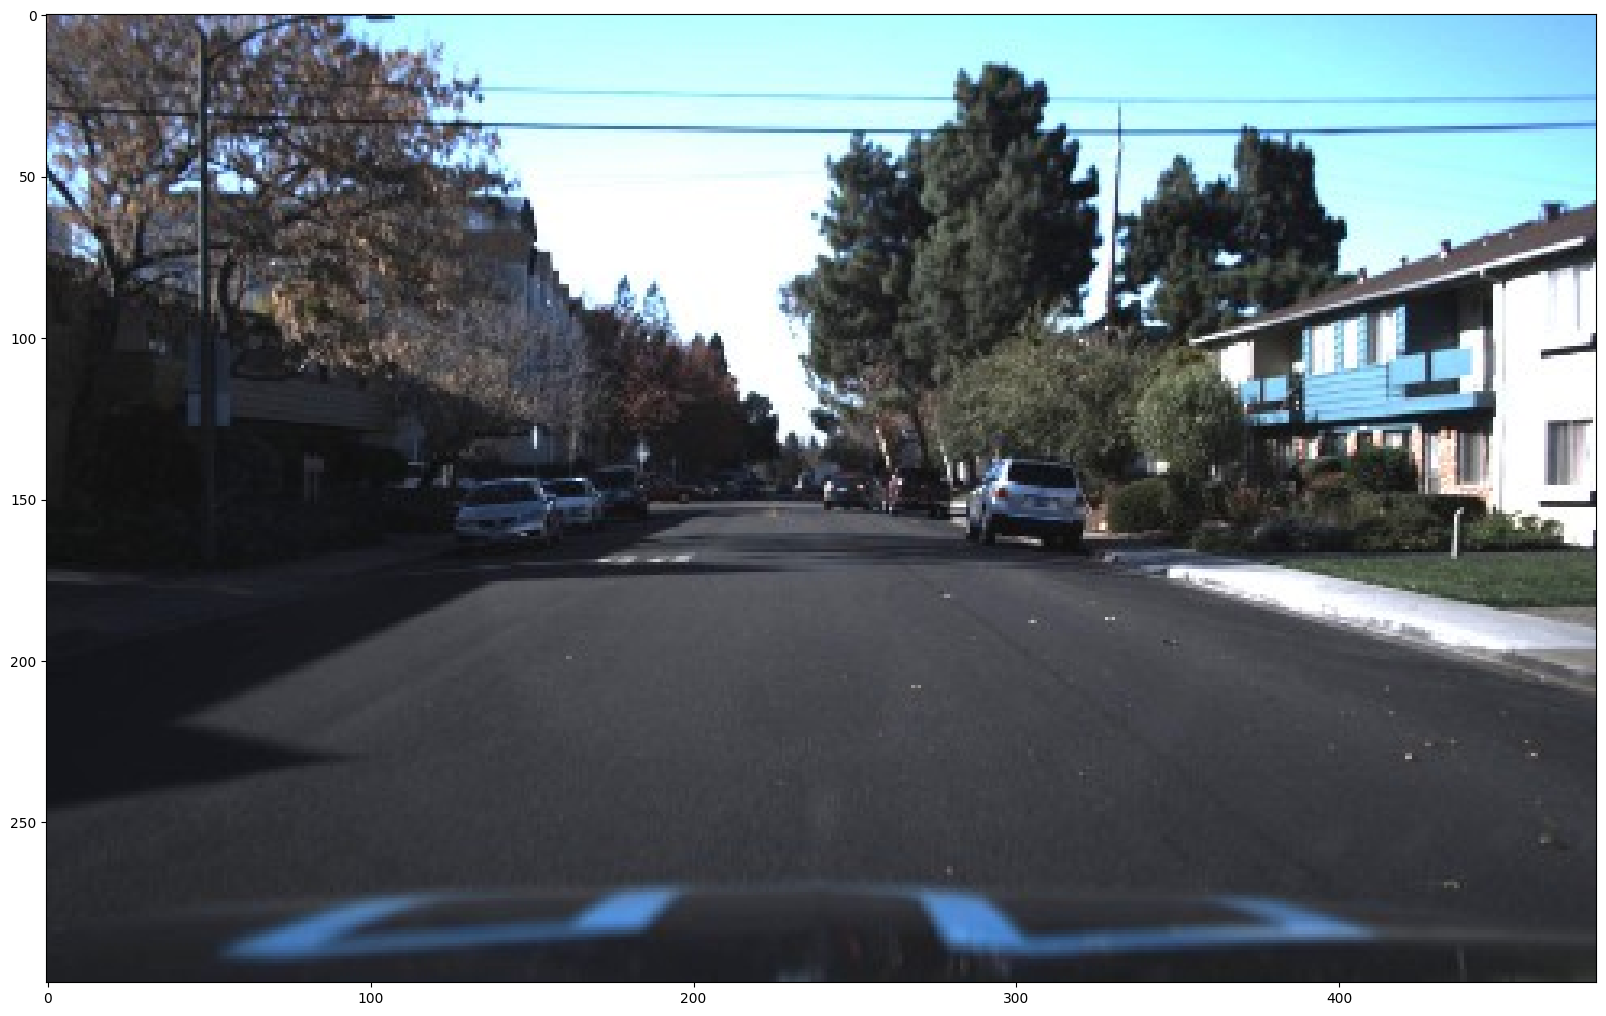

In [10]:
%matplotlib inline
plt.figure(figsize=(20,20))
img = cv2.imread('images/1479506176491553178.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# 2. Utilizando un dataset de objeto detection: Visualización autónoma

In [11]:
df = pd.read_csv('/content/labels_train.csv')
df

frame  xmin  xmax  ymin  ymax  class_id
0       1478019952686311006.jpg   237   251   143   155         1
1       1478019952686311006.jpg   437   454   120   186         3
2       1478019953180167674.jpg   218   231   146   158         1
3       1478019953689774621.jpg   171   182   141   154         2
4       1478019953689774621.jpg   179   191   144   155         1
...                         ...   ...   ...   ...   ...       ...
132401  1479506176491553178.jpg   166   186   139   156         1
132402  1479506176491553178.jpg   182   204   142   153         1
132403  1479506176491553178.jpg   239   261   139   155         1
132404  1479506176491553178.jpg   259   280   139   157         1
132405  1479506176491553178.jpg   284   324   137   168         1

[132406 rows x 6 columns]

In [12]:
print(img.shape)

(300, 480, 3)


In [13]:
gt_boxes={}
for index, row in df.iterrows():
  if row['class_id'] == 3:
    bbox = np.array([[row['ymin']/300, row['xmin']/480, row['ymax']/300, row['xmax']/480]], dtype=np.float32)
    if row['frame'] in gt_boxes:
      gt_boxes[row['frame']] = np.append(gt_boxes[row['frame']], np.array(bbox), axis=0)
    else:
      gt_boxes[row['frame']] = bbox

In [14]:
my_path = 'images/'
train_images_np = []

for image in gt_boxes.keys():
  im = cv2.imread(my_path + image)
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  train_images_np.append(im)

In [15]:
pedestrain_class_id = 1
num_classes = 1

category_index = {
    num_classes: {
        'id': pedestrain_class_id,
        'name': 'pedestrain'
    }
}


# 3. Utilizando un dataset de object detection: visualización final

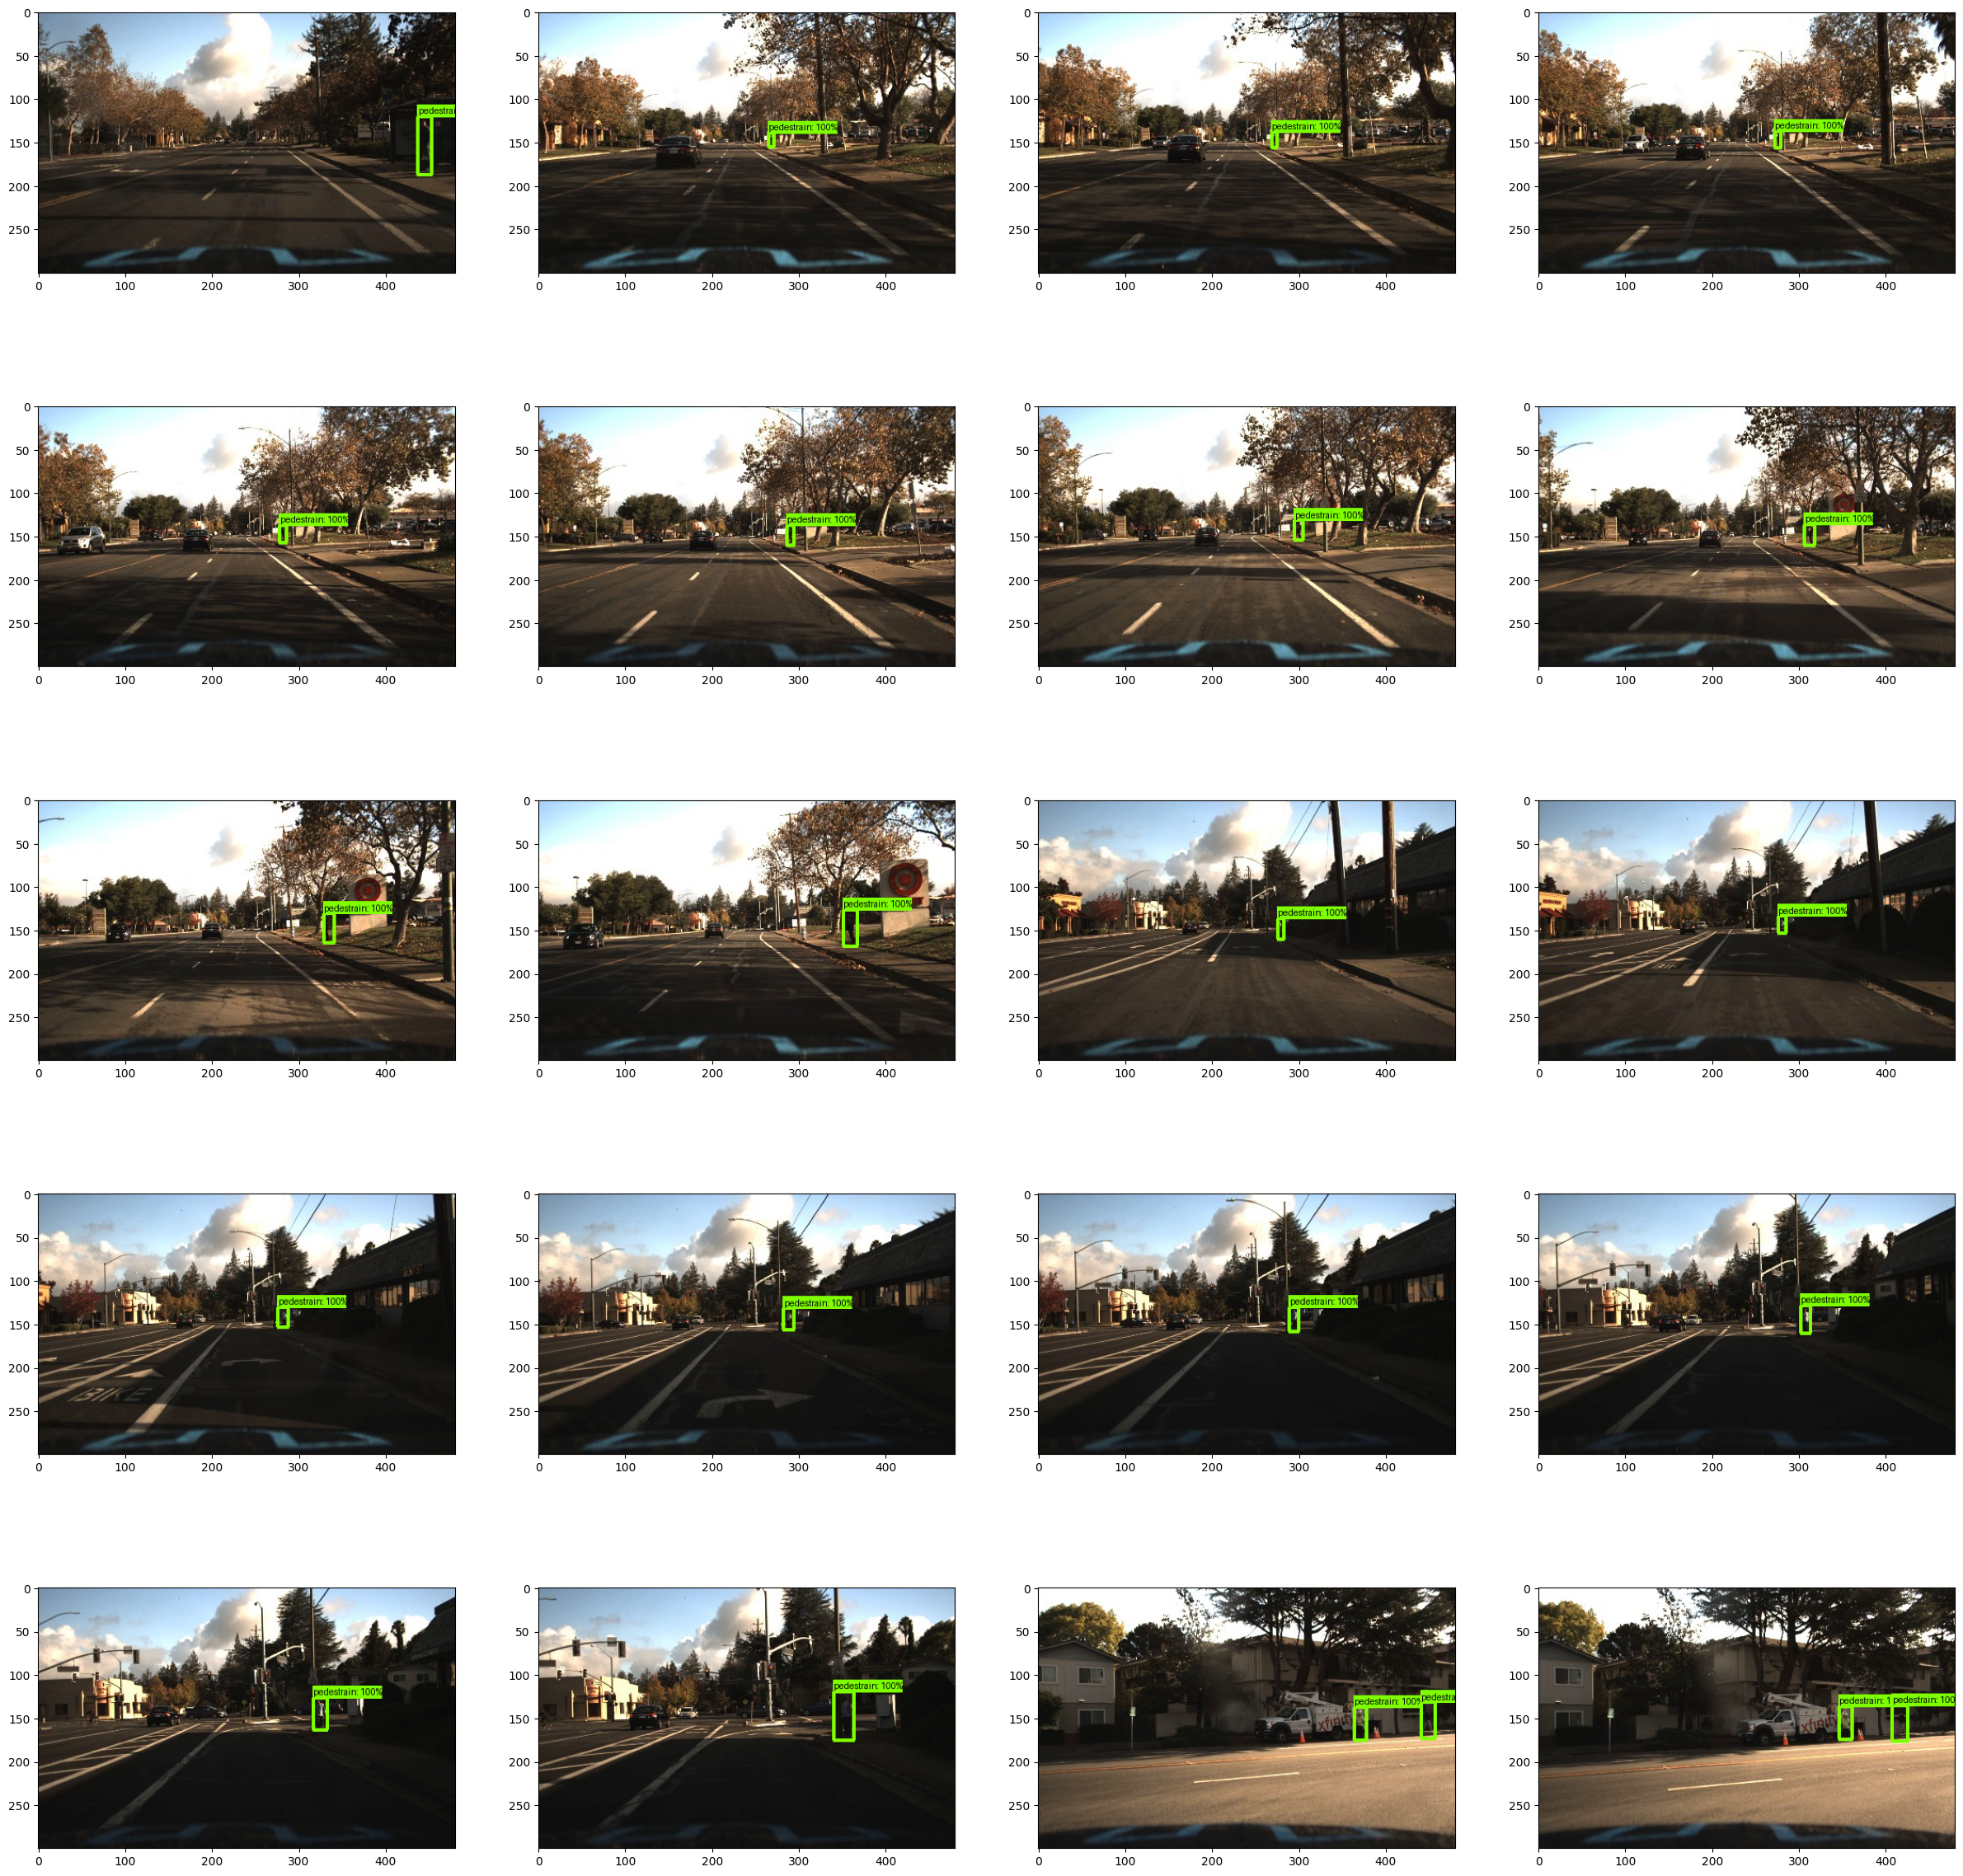

In [16]:
def plot_detections(image_np, boxes, classes, scores, category_index):
  image_np_with_annotations = image_np.copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_annotations,
      boxes,
      classes,
      scores,
      category_index,
      use_normalized_coordinates=True,
      min_score_thresh=0.5
  )
  plt.imshow(image_np_with_annotations)

plt.figure(figsize=(30, 30))
for idx in range(0, 20):
  bboxes = list(gt_boxes.values())[idx]
  dummy_scores = np.ones(shape=[bboxes.shape[0]], dtype=np.float32)
  plt.subplot(5, 4, idx+1)
  plot_detections(
      train_images_np[idx],
      bboxes,
      np.ones(shape=[bboxes.shape[0]], dtype=np.int32),
      dummy_scores,
      category_index
  )

plt.show()

# 4. Aumentado de datos con Albumentation

In [17]:
!pip install albumentations==1.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.2/29.2 MB 63.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.5/113.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 103.5 MB/s eta 0:00:00
  Created wheel for scikit-image: filename=scikit_image-0.18.3-cp310-cp310-linux_x86_64.whl size=36001591 sha256=1f78c2eb22a063a3623f601f0fe97be9dbdbf796660565989ea529d299ee7fe5
  Stored in directory: /root/.cache/pip/wheels/9d/55/80/c5bf730bc10906b1518cd6ebc05c87e69d1c46099ebdc9f59f
Successfully built scikit-image
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.24.0
    Uninstalling scikit-image-0.24.0:
      Successfully uninstalled scikit-image-0.24.0
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.20
    Uninstalling albumentations-1.4.

In [21]:
import albumentations as A

In [25]:
transforms = A.Compose([
                        A.HorizontalFlip(p=0.8),
                        A.RandomBrightnessContrast(p=0.8)
], bbox_params=A.BboxParams(format='albumentations'))

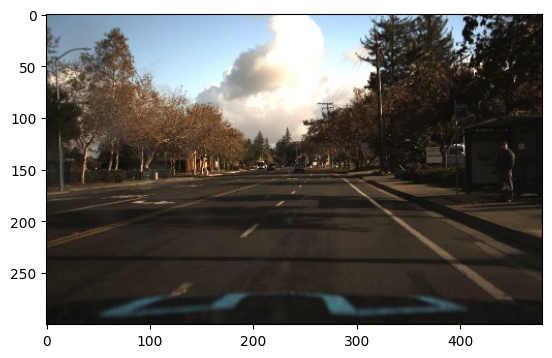

In [26]:
plt.figure()
plt.imshow(train_images_np[0])

In [27]:
bbox = list(gt_boxes.values())[0][0]

In [28]:
print(bbox)

[0.4        0.91041666 0.62       0.9458333 ]


In [30]:
bbox = [bbox[1], bbox[0], bbox[3], bbox[2]]

In [31]:
bbox.append('pedestrian')

In [32]:
bbox =[bbox]

In [37]:
transformed_image_1 = transforms(image=train_images_np[0], bboxes=bbox)
transformed_image_2 = transforms(image=train_images_np[0], bboxes=bbox)
transformed_image_3 = transforms(image=train_images_np[0], bboxes=bbox)

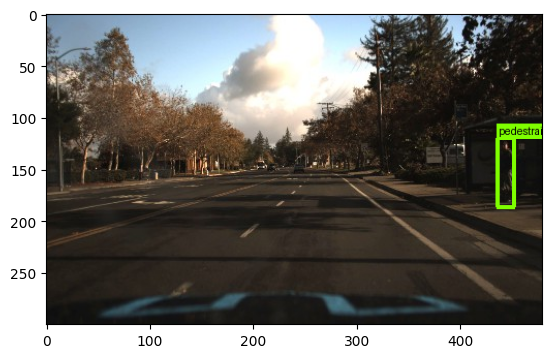

In [38]:
plt.figure()

plot_detections(
    train_images_np[0],
    np.array([list(gt_boxes.values())[0][0]]),
    np.ones(shape=[1], dtype=np.int32),
    dummy_scores,
    category_index
)

In [40]:
transformed_bbox_1 = (list(transformed_image_1['bboxes'][0])[:-1])

[0.4        0.91041666 0.62       0.9458333 ]


ValueError: could not convert string to float: 'pedestrian'

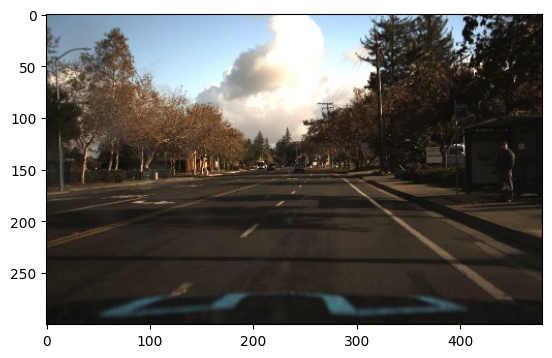

In [ ]:
transforms = A.Compose([
    A.HorizontalFlip(p=0.8),
    A.RandomBrightnessContrast(p=0.8)
], bbox_params=A.BboxParams(format='albumentations', label_fields=['class_labels']))

plt.figure()
plt.imshow(train_images_np[0])
bbox = list(gt_boxes.values())[0][0]  # Asegúrate de que esto contenga las coordenadas correctas
print(bbox)
bbox = [bbox[1], bbox[0], bbox[3], bbox[2]]  # Cambiar a formato [y_min, x_min, y_max, x_max]
bbox.append('pedestrian')  # Asegúrate de que esta etiqueta sea válida
bbox = [bbox]  # Convertir a lista de listas

# Cambia la forma en que pasas las etiquetas
transformed_image_1 = transforms(image=train_images_np[0], bboxes=bbox, class_labels=['pedestrian'])
transformed_image_2 = transforms(image=train_images_np[0], bboxes=bbox, class_labels=['pedestrian'])
transformed_image_3 = transforms(image=train_images_np[0], bboxes=bbox, class_labels=['pedestrian'])

[0.4        0.91041666 0.62       0.9458333 ]


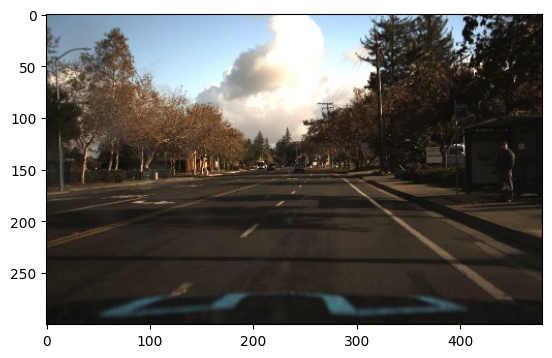

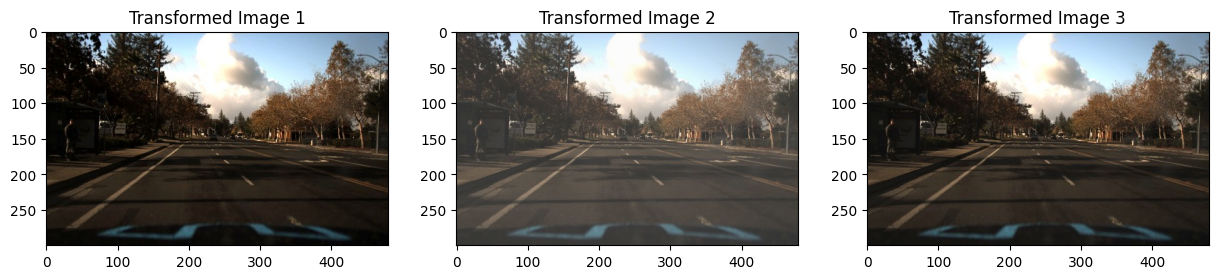

In [ ]:
import albumentations as A
import matplotlib.pyplot as plt

# Define las transformaciones
transforms = A.Compose([
    A.HorizontalFlip(p=0.8),
    A.RandomBrightnessContrast(p=0.8)
], bbox_params=A.BboxParams(format='albumentations', label_fields=['class_labels']))

plt.figure()
plt.imshow(train_images_np[0])  # Asegúrate de que esto sea una imagen válida

# Obtiene la caja delimitadora y ajusta el formato
bbox = list(gt_boxes.values())[0][0]
print(bbox)

# Ajusta el formato a [x_min, y_min, x_max, y_max]
bbox = [bbox[1], bbox[0], bbox[3], bbox[2]]  # [y_min, x_min, y_max, x_max]

# Crea la lista de etiquetas
class_labels = ['pedestrian']

# Envolver bbox en una lista para que sea compatible
bboxes = [bbox]  # Asegúrate de que sea una lista de listas

# Aplica las transformaciones
transformed_data_1 = transforms(image=train_images_np[0], bboxes=bboxes, class_labels=class_labels)
transformed_data_2 = transforms(image=train_images_np[0], bboxes=bboxes, class_labels=class_labels)
transformed_data_3 = transforms(image=train_images_np[0], bboxes=bboxes, class_labels=class_labels)

# Extrae la imagen transformada y las nuevas bounding boxes
transformed_image_1 = transformed_data_1['image']
transformed_bboxes_1 = transformed_data_1['bboxes']

transformed_image_2 = transformed_data_2['image']
transformed_bboxes_2 = transformed_data_2['bboxes']

transformed_image_3 = transformed_data_3['image']
transformed_bboxes_3 = transformed_data_3['bboxes']

# Visualizar las imágenes transformadas si lo deseas
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(transformed_image_1)
plt.title('Transformed Image 1')

plt.subplot(1, 3, 2)
plt.imshow(transformed_image_2)
plt.title('Transformed Image 2')

plt.subplot(1, 3, 3)
plt.imshow(transformed_image_3)
plt.title('Transformed Image 3')

plt.show()
